In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# connect by creating engine 
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for col in columns:
    print(col['name'], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
last_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date[0]


'2017-08-23'

In [13]:
pre_year = dt.datetime.strptime(last_date[0],'%Y-%m-%d') 
pre_year

datetime.datetime(2017, 8, 23, 0, 0)

In [14]:
lst_m = pre_year- dt.timedelta(days=365)

print(lst_m) 

2016-08-23 00:00:00


In [15]:
# Design a query to retrieve the last 12 months of precipitation data 

p = session.query(Measurement.date, Measurement.prcp).\
filter(func.date(Measurement.date)>=lst_m).\
order_by(Measurement.date.desc()).all() 

In [16]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
df_prcp = pd.DataFrame(p, columns=['date', 'prcp'])
df_prcp.set_index("date", inplace = True) 
#Sort the DataFrame values by date.
df_prcp.sort_values("date")

,prcp
date,
2016-08-24,1.45
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.15
2016-08-24,NaN
2016-08-24,2.28
2016-08-24,1.22
2016-08-25,0.11
2016-08-25,0.06


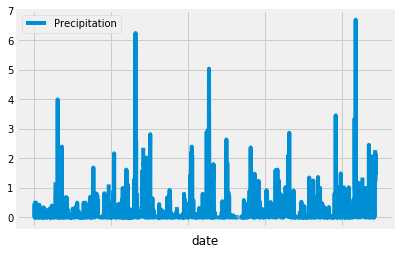

In [50]:
df_prcp.rename(columns={'date':'Date','prcp':'Precipitation'},inplace=True)
df_prcp.plot(x_compat=True) 

In [19]:
plt.show()

![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp['Precipitation'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

![describe](Images/describe.png)

In [21]:
engine.execute('select * from Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [22]:
columns = inspector.get_columns('station')
for col in columns:
    print(col['name'], col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
for row in session.query(Station.station).all():
    print(row)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [24]:
# Design a query to show how many stations are available in this dataset?
c_station = session.query(func.count(Station.id)).all() 
c_station

[(9)]

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count =session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).all()
df_station = pd.DataFrame(station_count, columns=['station','count'])
df_station_desc = df_station.sort_values('count', ascending = False)
df_station_desc


,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [26]:
station_count =session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).all()
df_station = pd.DataFrame(station_count, columns=['station','count'])
df_station_desc = df_station.sort_values('count', ascending = False)
df_station_desc

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [27]:
most_active = df_station_desc.iloc[0]
query_station = most_active[0]
query_station

'USC00519281'

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
p = session.query(Measurement.station,Measurement.id,Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(Measurement.station ==query_station).all() 
df_station_data = pd.DataFrame(p, columns=['station','id','date', 'prcp', 'tobs'])
df_station_data.head(5)

,station,id,date,prcp,tobs
0,USC00519281,12188,2010-01-01,0.15,70.0
1,USC00519281,12189,2010-01-02,0.00,62.0
2,USC00519281,12190,2010-01-03,0.00,74.0
3,USC00519281,12191,2010-01-04,0.00,75.0
4,USC00519281,12192,2010-01-05,0.00,74.0


In [31]:
print(query_station)

USC00519281


In [29]:
p = session.query(func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs)).\
filter(Measurement.station ==query_station).all() 


In [30]:
df_station_data = pd.DataFrame(p, columns=['Min Temp','Max Temp','Avg Temp'])
df_station_data

,Min Temp,Max Temp,Avg Temp
0,54.0,85.0,71.663781


In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

hist_data =session.query(Measurement.tobs.label('tobs')).\
        filter(func.date(Measurement.date)>=lst_m).\
        filter(Measurement.station ==query_station).\
        all()

#filter(Measurement.date <= end_date).all()
df_hist = pd.DataFrame(hist_data, columns=['tobs'])

df_hist.head(3)

,tobs
0,77.0
1,80.0
2,80.0


Text(0, 0.5, 'Frequency')

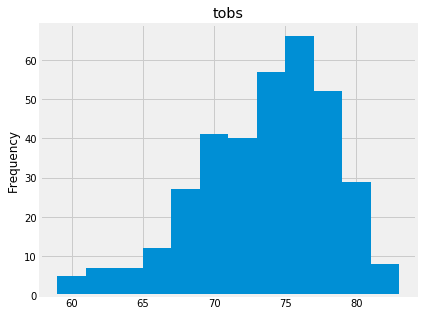

In [37]:
ax = df_hist.hist(column='tobs', bins=12, figsize=(6,5), zorder=2, rwidth=2)
plt.ylabel("Frequency")

![precipitation](Images/station-histogram.png)

In [40]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example


In [51]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps(lst_m, last_date[0]))


[(58.0, 74.57894736842105, 87.0)]


In [ ]:
#Optonal - partial

In [45]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rain_fall = session.query(Station.station,
                 func.sum(Measurement.prcp),
                 Station.name,
                 Station.elevation,
                 Station.latitude,
                 Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= (lst_m))\
.filter(Measurement.date <= '2017-08-23')\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())


In [47]:
for record in rain_fall:
    (Station.station, Measurement.prcp, Station.name,Station.elevation,Station.latitude, Station.longitude) = record
    print(
    f'{Station.station} {Measurement.prcp} {Station.latitude} {Station.longitude} {Station.elevation}')

USC00516128 147.11000000000004 21.3331 -157.8025 152.4
USC00519281 68.24000000000002 21.45167 -157.84888999999998 32.9
USC00513117 48.36000000000003 21.4234 -157.8015 14.6
USC00519523 37.99 21.33556 -157.71139 19.5
USC00514830 33.19 21.5213 -157.8374 7.0
USC00519397 16.089999999999986 21.2716 -157.8168 3.0
USC00517948 4.59 21.3934 -157.9751 11.9
